In [1]:
import numpy as np
import pandas as pd
import cv2
from scipy import misc
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Define the image size
img_size = (224, 224)

# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Define the train and test data directories
train_dir = r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\vgg16\train'
test_dir = r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\vgg16\test'

In [3]:
# Define the train and test generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical')

Found 3268 images belonging to 13 classes.
Found 653 images belonging to 13 classes.


In [4]:
# Define the VGG16 model
vgg16 = VGG16(include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Add a custom top to the VGG16 model
x = vgg16.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(13, activation='softmax')(x)

# Define the full model
model = Model(inputs=vgg16.input, outputs=predictions)

# Freeze the layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
batch_size = 32
epochs = 25
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
102/102 [==============================] - 941s 9s/step - loss: 1.7541 - acc: 0.4099 - val_loss: 1.3337 - val_acc: 0.5281
Epoch 2/25
102/102 [==============================] - 923s 9s/step - loss: 1.0694 - acc: 0.6474 - val_loss: 1.0745 - val_acc: 0.6570
Epoch 3/25
102/102 [==============================] - 897s 9s/step - loss: 0.7579 - acc: 0.7619 - val_loss: 0.8848 - val_acc: 0.7343
Epoch 4/25
102/102 [==============================] - 914s 9s/step - loss: 0.6612 - acc: 0.7898 - val_loss: 0.8608 - val_acc: 0.7037
Epoch 5/25
102/102 [==============================] - 938s 9s/step - loss: 0.5469 - acc: 0.8174 - val_loss: 0.7897 - val_acc: 0.7552
Epoch 6/25
102/102 [==============================] - 911s 9s/step - loss: 0.4728 - acc: 0.8533 - val_loss: 0.8313 - val_acc: 0.7262
Epoch 7/25
102/102 [==============================] - 819s 8s/step - loss: 0.4628 - acc: 0.8499 - val_loss: 0.9060 - val_acc: 0.7118
Epoch 8/25
102/102 [=

Test accuracy: 0.7697262480830993


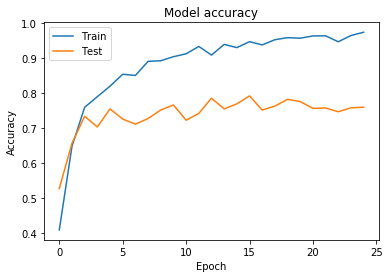

In [7]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate_generator(test_generator, test_generator.samples // batch_size)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy over time
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [8]:
model.save(r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\vgg16\model.h5')

#### testing

In [10]:
# Part 3 - Making new predictions
import numpy as np
from tensorflow.keras.preprocessing import image

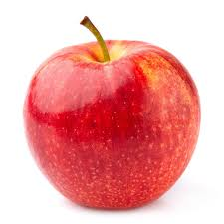

In [12]:
test_image = image.load_img(r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\CNN\new_te\apple.jpeg', target_size = (224, 224))
test_image

In [13]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices

print(result)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


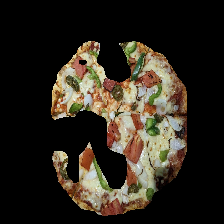

In [28]:
test_image = image.load_img(r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\seg\pizza10.jpg', target_size = (224, 224))
test_image

In [29]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices

print(result)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.4615541e-32 1.0000000e+00 0.0000000e+00 0.0000000e+00
  2.0758397e-15 0.0000000e+00 0.0000000e+00]]


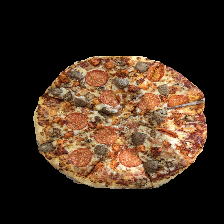

In [18]:
test_image = image.load_img(r'C:\Users\Kreena\Praxis\TERM 3\CAPSTONE\seg\pizza20.jpg', target_size = (224, 224))
test_image

In [19]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
train_generator.class_indices

print(result)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
